# Project 1

You are asked to create diagnostic decision model based on Bayes theory. Given data are two indices $p(x|\omega_1),p(x|\omega_2)$ that follow Gaussian distributions, where $x$ is the vector of the indices. Classes $\omega_1,\omega_2$ have a mean of $\mu_1=(0.4, 0.8), \mu_2=(1.5, 2.7)$ respectively and a-priori probabilities $P(\omega_1) = 0.95, P(\omega_2) = 0.05$

## Part A

For the first part both distributions have a common covariance matrix $\Sigma$ : 
$$ \Sigma = \begin{bmatrix} 1.5 & 0 \\ 0 & 0.8 \end{bmatrix}$$ 


In [ ]:
# Run this cell before anything else in order to import the necessary libraries and make the necessary variable declarations
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import matplotlib

mu_1 = np.array([0.4, 0.8])
mu_2 = np.array([1.5, 2.7])

p_omega_1 = 0.95
p_omega_2 = 0.05

sigma = np.array([[1.5, 0], [0, .8]])
x_0 = np.arange(-5, 5, 1)
x_1 = np.arange(-5, 5, 1)
x = np.array([x_0, x_1]).transpose()
x_0, x_1 = np.meshgrid(x_0, x_1)

### Question 1

Present the distribution prices for discrete values of $x$.

### Answer

We calculate $p(x|\omega_1), p(x|\omega_2)$, from Bayesian theory, for multivariate distributions, it is known:

$$p\left(\boldsymbol{x} \mid \omega_i\right)=\frac{1}{(2 \pi)^{d / 2}|\boldsymbol{\Sigma}|^{1 / 2}} \exp \left[-\frac{1}{2}(\boldsymbol{x}-\boldsymbol{\mu})^t \boldsymbol{\Sigma}^{-1}(\boldsymbol{x}-\boldsymbol{\mu})\right]
$$


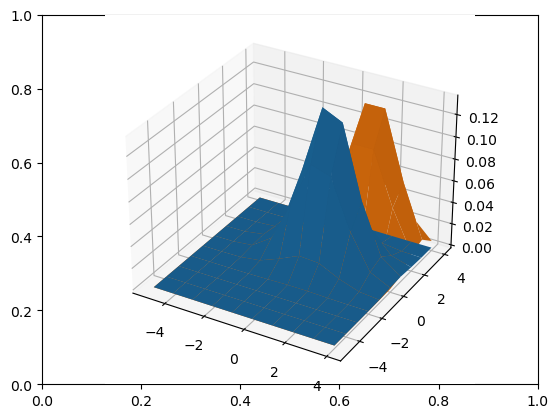

In [2]:
# Answer to question 1
def distribution_prices(x_0, x_1, mu, sigma):
    d = mu.shape[0]
    p = np.zeros([x_0.shape[0], x_0.shape[1]])
    for i in range(x_0.shape[0]):
        for j in range(x_1.shape[0]):
            p[i][j] = 1 / (pow((2 * np.pi), (d / 2)) * np.sqrt(np.linalg.det(sigma))) * np.exp(
                -0.5 * np.matmul(np.matmul(np.transpose(np.subtract([x_0[i][j], x_1[i][j]], mu)), np.linalg.inv(sigma)),
                                 np.subtract([x_0[i][j], x_1[i][j]], mu)))
    return p

distribution_prices_1 = distribution_prices(x_0, x_1, mu_1, sigma)
distribution_prices_2 = distribution_prices(x_0, x_1, mu_2, sigma)
fig = plt.figure()
fig.add_subplot()
ax = plt.axes(projection='3d')
surface_mu_1 = ax.plot_surface(x_0, x_1, distribution_prices_1)
surface_mu_2 = ax.plot_surface(x_0, x_1, distribution_prices_2)
plt.show()


### Question 2

Present the 

### Answer

The CDF of a multivariate distribution is given by the type below: $$p(x) = \sum_{j=1}^cp(x|\omega_j)P(\omega_j)$$

where P is the a-priori distribution of $\omega$ 

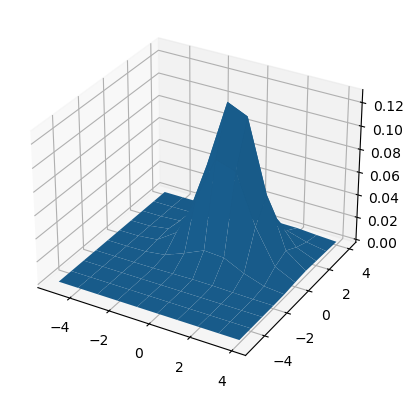

In [4]:
# Answer to question 2
def probability_distribution(x_0, x_1, mu_1, mu_2, sigma_1, sigma_2):
    d = mu_1.shape[0]

    probability_distrib = distribution_prices(x_0, x_1, mu_1, sigma_1) * p_omega_1 + distribution_prices(x_0, x_1, mu_2,
                                                                                                         sigma_2) * p_omega_2
    return probability_distrib


distribution = probability_distribution(x_0, x_1, mu_1, mu_2, sigma, sigma)
fig = plt.figure()
ax = plt.axes(projection='3d')
probability_of_surface = ax.plot_surface(x_0, x_1, distribution)
plt.show()


### Question 3
 
 Calculate and plot the a-posteriori probabilities $P(\omega_1|x),P(\omega_2|x)$.
 
 ### Answer
 
 For the minimum likelihood classification error $$g_i(x) = P(\omega_i|x)$$ where $g$ is the discriminant function.
 
 For discriminant functions 